In [15]:
from pandas import read_csv
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

LOADING DATA

In [16]:
from google.colab import files
import pandas as pd
data = pd.read_csv('qsar_aquatic_toxicity (1).csv', sep=";", 
                   names=['TPSA', 'SAacc', 'H-050', 'MLOGP', 'RDCHI', 'GATS1p', 'nN', 'C-040',
                          'quantitative response'])
data

,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


In [17]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TPSA                   546 non-null    float64
 1   SAacc                  546 non-null    float64
 2   H-050                  546 non-null    int64  
 3   MLOGP                  546 non-null    float64
 4   RDCHI                  546 non-null    float64
 5   GATS1p                 546 non-null    float64
 6   nN                     546 non-null    int64  
 7   C-040                  546 non-null    int64  
 8   quantitative response  546 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 38.5 KB


,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421
std,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500
50%,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000
75%,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000


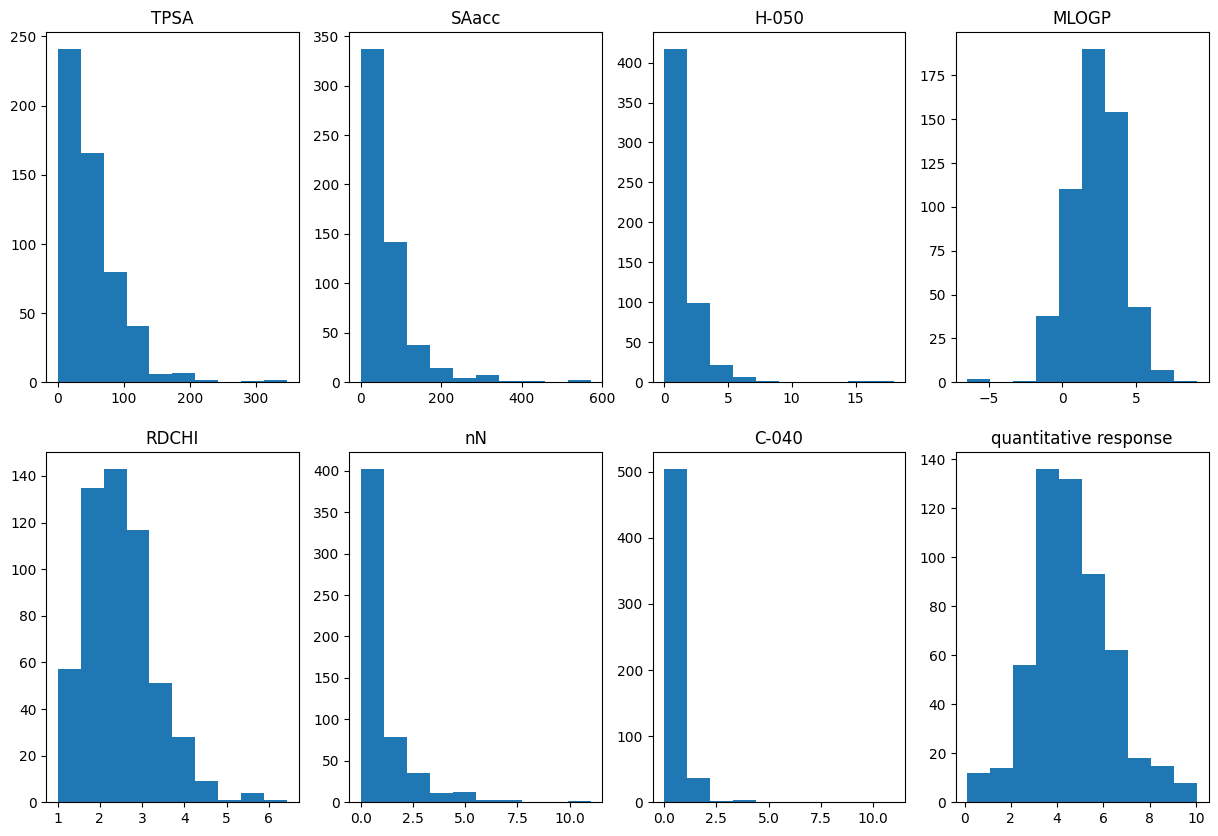

In [18]:
#Histogram Visualization
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
axs[0, 0].hist(data['TPSA'])
axs[0, 0].set_title('TPSA')

axs[0, 1].hist(data['SAacc'])
axs[0, 1].set_title('SAacc')

axs[0, 2].hist(data['H-050'])
axs[0, 2].set_title('H-050')

axs[0, 3].hist(data['MLOGP'])
axs[0, 3].set_title('MLOGP')

axs[1, 0].hist(data['RDCHI'])
axs[1, 0].set_title('RDCHI')

axs[1, 1].hist(data['nN'])
axs[1, 1].set_title('nN')

axs[1, 2].hist(data['C-040'])
axs[1, 2].set_title('C-040')

axs[1, 3].hist(data['quantitative response'])
axs[1, 3].set_title('quantitative response')

plt.show()

In [19]:
#Define a function to get the columns that don’t have any missing values
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [21]:
#Get the columns that do not have any missing values
num_cols = get_cols_with_no_nans(data, 'num')
cat_cols = get_cols_with_no_nans(data, 'no_num')
     
#How many column we got
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))
     
data = data[num_cols + cat_cols]

Number of numerical columns with no nan values : 9
Number of nun-numerical columns with no nan values : 0


SPLITTING THE DATA

In [22]:
#Split Data
#70% of data for data training and 30% of data for data testing
x_train, x_test, y_train, y_test = train_test_split(data.drop(axis=0, columns='quantitative response'),
                                                   data['quantitative response'],
                                                   test_size=0.3)
print("Train: ", len(x_train))
print("Test: ", len(x_test))

Train:  382
Test:  164


DATA PREPROCESSING

In [23]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

Mead Squared Error Linear Regression :  1.5613749836400574
Mead Squared Error Multilayer Perceptron :  1.4227343476997514


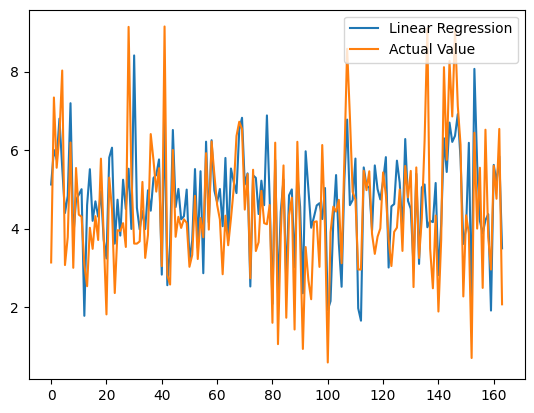

In [26]:
lnr = LinearRegression()
mlp = MLPRegressor()

lnr.fit(x_train, y_train)
mlp.fit(x_train, y_train)

hasil_lnr = lnr.predict(x_test)
hasil_mlp = mlp.predict(x_test)

print("Mead Squared Error Linear Regression : " ,mean_squared_error(y_test, hasil_lnr))
print("Mead Squared Error Multilayer Perceptron : " ,mean_squared_error(y_test, hasil_mlp))

plt.plot(list(hasil_lnr), label='Linear Regression')
plt.plot(list(y_test), label='Actual Value')

plt.legend(loc="upper right")

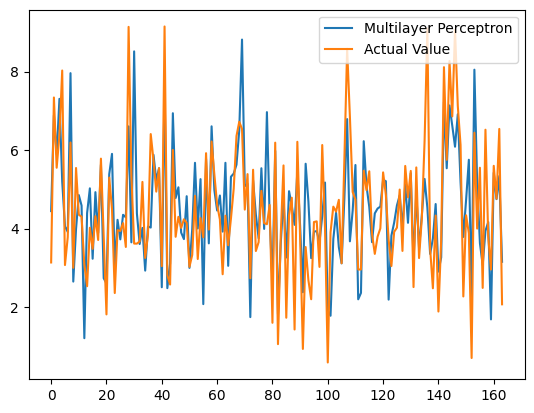

In [27]:
plt.plot(list(hasil_mlp), label='Multilayer Perceptron')
plt.plot(list(y_test), label='Actual Value')

plt.legend(loc="upper right")

MODEL TRAINING

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the models to use
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Define the hyperparameters to tune for each model
params = [
    {},
    {'alpha': [0.1, 1, 10]},
    {'alpha': [0.1, 1, 10]},
    {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7]},
    {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7]}
]

# Apply hyperparameter tuning for each model
best_models = []
for i, model in enumerate(models):
    print(f'Tuning model {i+1}...')
    grid = GridSearchCV(model, params[i], cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f'Best parameters for model {i+1}: {grid.best_params_}')
    print(f'Training R-squared for model {i+1}: {grid.best_score_:.3f}')
    best_models.append(grid.best_estimator_)

# Evaluate the best models on the test set
for i, model in enumerate(best_models):
    print(f'Testing model {i+1}...')
    score = model.score(X_test, y_test)
    print(f'Test R-squared for model {i+1}: {score:.3f}')


Tuning model 1...
Best parameters for model 1: {}
Training R-squared for model 1: 0.416
Tuning model 2...
Best parameters for model 2: {'alpha': 1}
Training R-squared for model 2: 0.417
Tuning model 3...
Best parameters for model 3: {'alpha': 0.1}
Training R-squared for model 3: 0.360
Tuning model 4...
Best parameters for model 4: {'max_depth': 7, 'n_estimators': 100}
Training R-squared for model 4: 0.456
Tuning model 5...
Best parameters for model 5: {'max_depth': 3, 'n_estimators': 50}
Training R-squared for model 5: 0.464
Testing model 1...
Test R-squared for model 1: 0.430
Testing model 2...
Test R-squared for model 2: 0.430
Testing model 3...
Test R-squared for model 3: 0.361
Testing model 4...
Test R-squared for model 4: 0.548
Testing model 5...
Test R-squared for model 5: 0.516


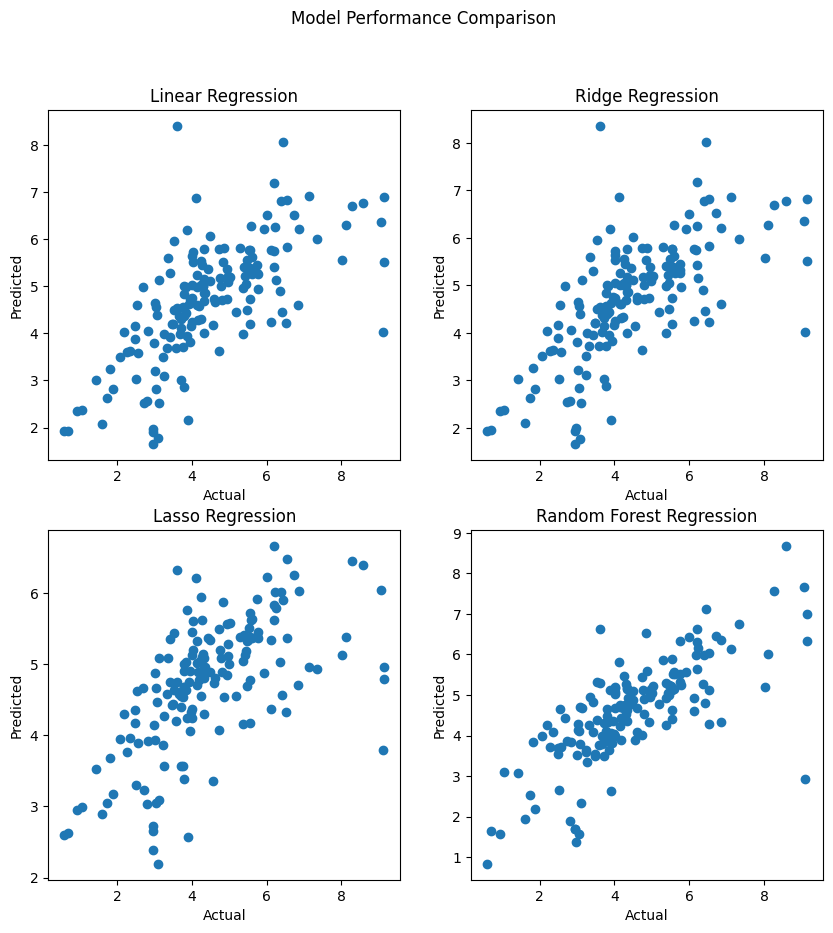

In [30]:
import matplotlib.pyplot as plt

# Create a scatter plot to compare the actual values with the predicted values for each model
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Model Performance Comparison')

axs[0, 0].scatter(y_test, best_models[0].predict(X_test))
axs[0, 0].set_xlabel('Actual')
axs[0, 0].set_ylabel('Predicted')
axs[0, 0].set_title('Linear Regression')

axs[0, 1].scatter(y_test, best_models[1].predict(X_test))
axs[0, 1].set_xlabel('Actual')
axs[0, 1].set_ylabel('Predicted')
axs[0, 1].set_title('Ridge Regression')

axs[1, 0].scatter(y_test, best_models[2].predict(X_test))
axs[1, 0].set_xlabel('Actual')
axs[1, 0].set_ylabel('Predicted')
axs[1, 0].set_title('Lasso Regression')

axs[1, 1].scatter(y_test, best_models[3].predict(X_test))
axs[1, 1].set_xlabel('Actual')
axs[1, 1].set_ylabel('Predicted')
axs[1, 1].set_title('Random Forest Regression')

plt.show()
